In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error, root_mean_squared_error,mean_absolute_error


In [ ]:
df = pd.read_csv('train.csv').iloc[:, 1:]
df

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,346.0,12.5,0.25,0.25,0.75,0.63,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.579982,0.466183,39.288162,7660.88604
1,707.0,25.0,0.50,0.38,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.476202,0.413904,34.744180,5946.05226
2,42.0,12.5,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.442693,0.427277,34.159346,4867.94772
3,532.0,25.0,0.50,0.25,0.50,0.75,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.389453,0.381768,29.833158,4042.84264
4,380.0,12.5,0.25,0.38,0.38,0.75,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.633463,0.517160,44.278583,8254.12654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,572.0,25.0,0.50,0.25,0.50,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.525063,0.462462,37.033298,6493.47253
14996,734.0,25.0,0.50,0.38,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.384646,0.395636,29.742583,3826.17226
14997,736.0,25.0,0.50,0.38,0.50,0.75,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.462752,0.437923,34.702412,5367.61826
14998,301.0,12.5,0.25,0.25,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.517723,0.460369,37.379452,6328.89332


In [ ]:
df.describe()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,427.661000,19.813000,0.386948,0.283968,0.487883,0.592445,82.247747,49.716600,68.716073,59.282347,28.686787,48.612267,18.872669,0.328190,0.499957,0.445531,36.064502,6009.294311
std,213.281489,6.657739,0.333622,0.058612,0.149041,0.145625,9.101710,5.519546,7.602871,6.580402,3.179193,5.363480,11.864746,0.166879,0.076711,0.038130,4.080522,1356.655150
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,55.900000,33.000000,24.300000,41.200000,1.000000,0.020000,0.192732,0.192732,22.079199,1637.704020
25%,247.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.451104,0.417947,33.228900,5126.993180
50%,468.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.505120,0.446451,36.018624,6107.382470
75%,597.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.559628,0.471665,39.046593,7019.694380
max,776.000000,37.500000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.836961,0.836961,47.803070,8969.401840


PREPROCESADO

In [ ]:
#Buscar si hay filas duplicadas y eliminarlas
df_preprocesado = df
df_preprocesado.drop_duplicates()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,346.0,12.5,0.25,0.25,0.75,0.63,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.579982,0.466183,39.288162,7660.88604
1,707.0,25.0,0.50,0.38,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.476202,0.413904,34.744180,5946.05226
2,42.0,12.5,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.442693,0.427277,34.159346,4867.94772
3,532.0,25.0,0.50,0.25,0.50,0.75,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.389453,0.381768,29.833158,4042.84264
4,380.0,12.5,0.25,0.38,0.38,0.75,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.633463,0.517160,44.278583,8254.12654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,572.0,25.0,0.50,0.25,0.50,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.525063,0.462462,37.033298,6493.47253
14996,734.0,25.0,0.50,0.38,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.384646,0.395636,29.742583,3826.17226
14997,736.0,25.0,0.50,0.38,0.50,0.75,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.462752,0.437923,34.702412,5367.61826
14998,301.0,12.5,0.25,0.25,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.517723,0.460369,37.379452,6328.89332


In [ ]:
df_yield = df['yield'];
df_numericos = df.drop(['yield'],axis=1);
df_numericos

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,346.0,12.5,0.25,0.25,0.75,0.63,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.579982,0.466183,39.288162
1,707.0,25.0,0.50,0.38,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.476202,0.413904,34.744180
2,42.0,12.5,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.442693,0.427277,34.159346
3,532.0,25.0,0.50,0.25,0.50,0.75,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.389453,0.381768,29.833158
4,380.0,12.5,0.25,0.38,0.38,0.75,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.633463,0.517160,44.278583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,572.0,25.0,0.50,0.25,0.50,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.525063,0.462462,37.033298
14996,734.0,25.0,0.50,0.38,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.384646,0.395636,29.742583
14997,736.0,25.0,0.50,0.38,0.50,0.75,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.462752,0.437923,34.702412
14998,301.0,12.5,0.25,0.25,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.517723,0.460369,37.379452


Correlacion

In [ ]:
df_numericos.corr()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
Row#,1.000000,0.551815,0.320589,0.454761,0.428110,0.393901,-0.016083,-0.016153,-0.016488,-0.015405,-0.016189,-0.016163,0.000091,-0.001980,-0.034685,-0.037967,-0.041846
clonesize,0.551815,1.000000,0.323110,0.068962,0.020542,-0.053376,0.001037,0.001115,0.000777,0.001491,0.001018,0.000992,0.171250,0.173323,-0.422298,-0.386094,-0.400040
honeybee,0.320589,0.323110,1.000000,0.004711,0.022359,-0.007317,0.001280,0.001302,0.001211,0.001467,0.001270,0.001224,0.038376,0.035129,-0.140394,-0.132652,-0.131992
bumbles,0.454761,0.068962,0.004711,1.000000,-0.122917,0.164315,-0.013316,-0.013224,-0.013412,-0.013111,-0.013237,-0.013136,-0.080735,-0.077115,0.157615,0.153012,0.162306
andrena,0.428110,0.020542,0.022359,-0.122917,1.000000,0.346980,-0.013487,-0.013508,-0.013462,-0.012917,-0.013662,-0.013663,-0.055184,-0.057687,0.126947,0.111871,0.112315
osmia,0.393901,-0.053376,-0.007317,0.164315,0.346980,1.000000,-0.000424,-0.000801,-0.001081,0.000437,-0.000579,-0.000592,-0.101966,-0.103606,0.279958,0.254787,0.259644
MaxOfUpperTRange,-0.016083,0.001037,0.001280,-0.013316,-0.013487,-0.000424,1.000000,0.998869,0.998861,0.999013,0.999710,0.999573,-0.018375,-0.019319,0.037378,0.159583,0.075223
MinOfUpperTRange,-0.016153,0.001115,0.001302,-0.013224,-0.013508,-0.000801,0.998869,1.000000,0.998921,0.997682,0.999601,0.999756,-0.018669,-0.019669,0.037558,0.159881,0.075392
AverageOfUpperTRange,-0.016488,0.000777,0.001211,-0.013412,-0.013462,-0.001081,0.998861,0.998921,1.000000,0.997793,0.999213,0.999200,-0.017810,-0.018821,0.037551,0.160320,0.075521
MaxOfLowerTRange,-0.015405,0.001491,0.001467,-0.013111,-0.012917,0.000437,0.999013,0.997682,0.997793,1.000000,0.998649,0.998485,-0.018707,-0.019681,0.037857,0.160229,0.075672


Normalizacion

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
norm = scaler.fit_transform(df_numericos)
df_preprocesado_normalizado = pd.DataFrame(norm)

In [ ]:
df_preprocesado_normalizado

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.445876,0.090909,0.013565,0.427350,1.000000,0.840000,0.000000,0.170330,0.099567,0.488636,0.000000,0.000000,0.454545,0.444444,0.601107,0.424463,0.668988
1,0.911082,0.545455,0.027130,0.649573,0.666667,0.666667,0.000000,0.170330,0.099567,0.488636,0.000000,0.000000,1.000000,1.000000,0.440015,0.343313,0.492344
2,0.054124,0.090909,0.013565,0.427350,0.333333,0.333333,0.654618,0.714286,0.692641,0.823864,0.655172,0.653061,1.000000,1.000000,0.388001,0.364072,0.469608
3,0.685567,0.545455,0.027130,0.427350,0.666667,1.000000,0.000000,0.170330,0.099567,0.488636,0.000000,0.000000,1.000000,1.000000,0.305359,0.293430,0.301430
4,0.489691,0.090909,0.013565,0.649573,0.506667,1.000000,0.654618,0.714286,0.692641,0.823864,0.655172,0.653061,0.696970,0.685185,0.684123,0.503591,0.862988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.737113,0.545455,0.027130,0.427350,0.666667,0.840000,0.654618,0.714286,0.692641,0.823864,0.655172,0.653061,0.454545,0.444444,0.515860,0.418688,0.581332
14996,0.945876,0.545455,0.027130,0.649573,0.666667,0.840000,0.309237,0.428571,0.380952,0.647727,0.310345,0.312925,1.000000,1.000000,0.297898,0.314957,0.297909
14997,0.948454,0.545455,0.027130,0.649573,0.666667,1.000000,0.654618,0.714286,0.692641,0.823864,0.655172,0.653061,0.454545,0.444444,0.419138,0.380596,0.490720
14998,0.387887,0.090909,0.013565,0.427350,0.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.148148,0.504466,0.415438,0.594788


In [ ]:
#Cuando preprocesamos perdemos las columnas, por lo que hay que copiar los indices de las columnas del original
df_preprocesado_normalizado.columns = df_numericos.columns

df_preprocesado_normalizado

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,0.445876,0.090909,0.013565,0.427350,1.000000,0.840000,0.000000,0.170330,0.099567,0.488636,0.000000,0.000000,0.454545,0.444444,0.601107,0.424463,0.668988
1,0.911082,0.545455,0.027130,0.649573,0.666667,0.666667,0.000000,0.170330,0.099567,0.488636,0.000000,0.000000,1.000000,1.000000,0.440015,0.343313,0.492344
2,0.054124,0.090909,0.013565,0.427350,0.333333,0.333333,0.654618,0.714286,0.692641,0.823864,0.655172,0.653061,1.000000,1.000000,0.388001,0.364072,0.469608
3,0.685567,0.545455,0.027130,0.427350,0.666667,1.000000,0.000000,0.170330,0.099567,0.488636,0.000000,0.000000,1.000000,1.000000,0.305359,0.293430,0.301430
4,0.489691,0.090909,0.013565,0.649573,0.506667,1.000000,0.654618,0.714286,0.692641,0.823864,0.655172,0.653061,0.696970,0.685185,0.684123,0.503591,0.862988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.737113,0.545455,0.027130,0.427350,0.666667,0.840000,0.654618,0.714286,0.692641,0.823864,0.655172,0.653061,0.454545,0.444444,0.515860,0.418688,0.581332
14996,0.945876,0.545455,0.027130,0.649573,0.666667,0.840000,0.309237,0.428571,0.380952,0.647727,0.310345,0.312925,1.000000,1.000000,0.297898,0.314957,0.297909
14997,0.948454,0.545455,0.027130,0.649573,0.666667,1.000000,0.654618,0.714286,0.692641,0.823864,0.655172,0.653061,0.454545,0.444444,0.419138,0.380596,0.490720
14998,0.387887,0.090909,0.013565,0.427350,0.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.148148,0.504466,0.415438,0.594788


In [ ]:
Y = df_yield
X = df_numericos

MODELO DE REGRESIÓN: LinearRegression

Predecir la relacion entre el peso y la obesidad tipo 3

In [ ]:
X_regression = df_numericos
Y_regression = df_yield

In [ ]:
from sklearn.linear_model import LinearRegression

modelregresion = LinearRegression()
modelregresion.fit(pd.DataFrame(X_regression), Y_regression)

LinearRegression()

In [ ]:
#Prediccion del bloque de pruebas
y_pred_regresion = modelregresion.predict(pd.DataFrame(X_regression))

Metricas de evaluación

In [ ]:
r2_score(Y_regression, y_pred_regresion)

0.9091437421587092

In [ ]:
mean_squared_error(Y_regression, y_pred_regresion)

167210.99340201778

In [ ]:
median_absolute_error(Y_regression, y_pred_regresion)

np.float64(193.1725135066372)

In [ ]:
root_mean_squared_error(Y_regression, y_pred_regresion)

408.9144084059863

In [ ]:
mean_absolute_error(Y_regression, y_pred_regresion)

274.0635879765366

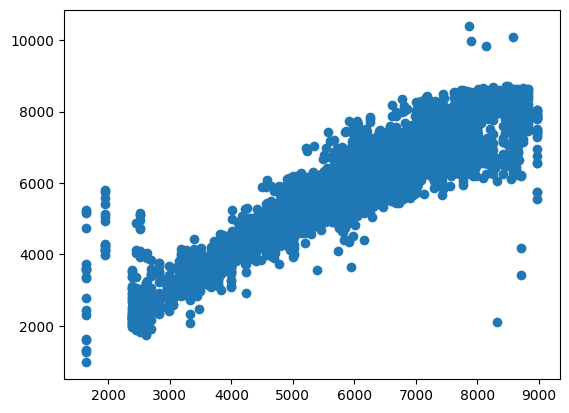

In [ ]:
plt.scatter(Y_regression, y_pred_regresion)

Observando las diferentes métricas, podemos apreciar que la que mejor encaja con nuestro modelo es r2_score

In [ ]:
df_preprocesado_normalizado.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,0.445876,0.090909,0.013565,0.427350,1.000000,0.840000,0.000000,0.170330,0.099567,0.488636,0.000000,0.000000,0.454545,0.444444,0.601107,0.424463,0.668988
1,0.911082,0.545455,0.027130,0.649573,0.666667,0.666667,0.000000,0.170330,0.099567,0.488636,0.000000,0.000000,1.000000,1.000000,0.440015,0.343313,0.492344
2,0.054124,0.090909,0.013565,0.427350,0.333333,0.333333,0.654618,0.714286,0.692641,0.823864,0.655172,0.653061,1.000000,1.000000,0.388001,0.364072,0.469608
3,0.685567,0.545455,0.027130,0.427350,0.666667,1.000000,0.000000,0.170330,0.099567,0.488636,0.000000,0.000000,1.000000,1.000000,0.305359,0.293430,0.301430
4,0.489691,0.090909,0.013565,0.649573,0.506667,1.000000,0.654618,0.714286,0.692641,0.823864,0.655172,0.653061,0.696970,0.685185,0.684123,0.503591,0.862988


In [ ]:
df_test = pd.read_csv('./test.csv')
df_test.head()

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15000,515.0,25.0,0.50,0.25,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.402948,0.408526,32.924021
1,15001,752.0,25.0,0.50,0.38,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.558394,0.479607,39.448650
2,15002,755.0,25.0,0.50,0.38,0.63,0.50,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.621376,0.513172,43.955361
3,15003,447.0,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.320417,0.388819,27.442427
4,15004,269.0,12.5,0.25,0.25,0.63,0.50,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.511752,0.426371,33.942014


In [ ]:
test_id = df_test['id']
test_without_id = df_test.drop(['id'],axis=1);

In [ ]:
#Buscar si hay filas duplicadas y eliminarlas
df_test = df
df_test.drop_duplicates()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,346.0,12.5,0.25,0.25,0.75,0.63,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.579982,0.466183,39.288162,7660.88604
1,707.0,25.0,0.50,0.38,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.476202,0.413904,34.744180,5946.05226
2,42.0,12.5,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.442693,0.427277,34.159346,4867.94772
3,532.0,25.0,0.50,0.25,0.50,0.75,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.389453,0.381768,29.833158,4042.84264
4,380.0,12.5,0.25,0.38,0.38,0.75,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.633463,0.517160,44.278583,8254.12654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,572.0,25.0,0.50,0.25,0.50,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.525063,0.462462,37.033298,6493.47253
14996,734.0,25.0,0.50,0.38,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.384646,0.395636,29.742583,3826.17226
14997,736.0,25.0,0.50,0.38,0.50,0.75,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.462752,0.437923,34.702412,5367.61826
14998,301.0,12.5,0.25,0.25,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.517723,0.460369,37.379452,6328.89332


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_test = MinMaxScaler()

norm_test = scaler_test.fit_transform(test_without_id)
df_preprocesado_normalizado_test = pd.DataFrame(norm_test)

In [ ]:
#Cuando preprocesamos perdemos las columnas, por lo que hay que copiar los indices de las columnas del original
df_preprocesado_normalizado.columns = df_numericos.columns

df_preprocesado_normalizado

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,0.445876,0.090909,0.013565,0.427350,1.000000,0.840000,0.000000,0.170330,0.099567,0.488636,0.000000,0.000000,0.454545,0.444444,0.601107,0.424463,0.668988
1,0.911082,0.545455,0.027130,0.649573,0.666667,0.666667,0.000000,0.170330,0.099567,0.488636,0.000000,0.000000,1.000000,1.000000,0.440015,0.343313,0.492344
2,0.054124,0.090909,0.013565,0.427350,0.333333,0.333333,0.654618,0.714286,0.692641,0.823864,0.655172,0.653061,1.000000,1.000000,0.388001,0.364072,0.469608
3,0.685567,0.545455,0.027130,0.427350,0.666667,1.000000,0.000000,0.170330,0.099567,0.488636,0.000000,0.000000,1.000000,1.000000,0.305359,0.293430,0.301430
4,0.489691,0.090909,0.013565,0.649573,0.506667,1.000000,0.654618,0.714286,0.692641,0.823864,0.655172,0.653061,0.696970,0.685185,0.684123,0.503591,0.862988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.737113,0.545455,0.027130,0.427350,0.666667,0.840000,0.654618,0.714286,0.692641,0.823864,0.655172,0.653061,0.454545,0.444444,0.515860,0.418688,0.581332
14996,0.945876,0.545455,0.027130,0.649573,0.666667,0.840000,0.309237,0.428571,0.380952,0.647727,0.310345,0.312925,1.000000,1.000000,0.297898,0.314957,0.297909
14997,0.948454,0.545455,0.027130,0.649573,0.666667,1.000000,0.654618,0.714286,0.692641,0.823864,0.655172,0.653061,0.454545,0.444444,0.419138,0.380596,0.490720
14998,0.387887,0.090909,0.013565,0.427350,0.840000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.148148,0.504466,0.415438,0.594788


In [ ]:
#Prediccion del bloque de pruebas
y_pred_regresion_test = modelregresion.predict(pd.DataFrame(test_without_id))

In [ ]:
y_pred_regresion_test

array([4462.35792426, 7045.07168043, 8079.47176384, ..., 6352.22052376,
       7535.89596455, 8342.78154376])

In [ ]:
df_sample = pd.DataFrame({
    'id': test_id,
    'yield': y_pred_regresion_test
})
df_sample.to_csv('sample_submission.csv', index=False)